In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# 构造数据
np.random.seed(0)
x = np.linspace(-10, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 20, 100)  # 添加噪声

# 转换为PyTorch张量
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

Epoch [100/1000], Loss: 403.3728
Epoch [200/1000], Loss: 403.3252
Epoch [300/1000], Loss: 403.3243
Epoch [400/1000], Loss: 403.3244
Epoch [500/1000], Loss: 403.3243
Epoch [600/1000], Loss: 403.3243
Epoch [700/1000], Loss: 403.3243
Epoch [800/1000], Loss: 403.3243
Epoch [900/1000], Loss: 403.3243
Epoch [1000/1000], Loss: 403.3243


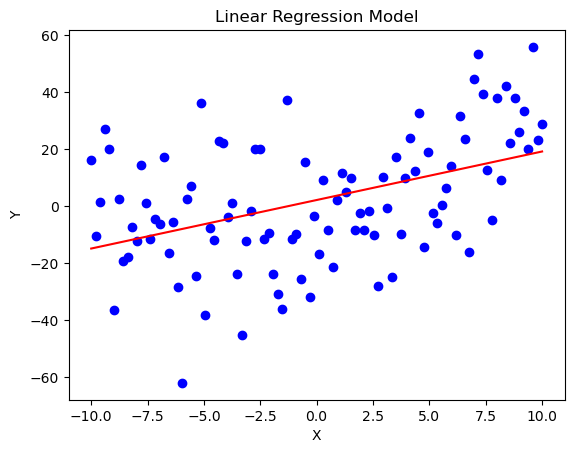

In [4]:
# 定义线性回归模型
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# 实例化模型
model = LinearRegressionModel()

# 定义损失函数（均方误差）
criterion = nn.MSELoss()

# 选择优化器（梯度下降）
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 测试模型
with torch.no_grad():
    predicted = model(x_tensor)
    
plt.scatter(x, y, color='blue')  # 绘制原始数据点
plt.plot(x, predicted.numpy(), color='red')  # 绘制拟合直线
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Model')
plt.show()

全连接神经网络基础小作业：
基于torch实战线性回归代码，构造形状像一元二次曲线的数据，并使用nn.Module提供的forward框架训练一个模型，最后在同一副图中绘制模型的一元二次曲线与构造数据的散点图

构造形状像一元二次曲线的数据

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# 设置随机种子以确保结果可复现
np.random.seed(0)

# 构造一元二次曲线数据
x = np.linspace(-10, 10, 100)
y = 3 * x**2 + 4 * x + 6 + np.random.normal(0, 20, 100)  # 添加噪声

# 转换为PyTorch张量
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

使用nn.Module提供的forward框架训练一个模型

In [12]:
# 定义二次回归模型
class QuadraticRegressionModel(nn.Module):
    def __init__(self):
        super(QuadraticRegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 50)  # 输入层到隐藏层
        self.fc2 = nn.Linear(50, 1)  # 隐藏层到输出层

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 使用ReLU激活函数
        x = self.fc2(x)
        return x

# 实例化模型
model = QuadraticRegressionModel()

# 定义损失函数（均方误差）
criterion = nn.MSELoss()

# 选择优化器（梯度下降）
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型的函数
def train_model(model, criterion, optimizer, x_tensor, y_tensor, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()  # 清空梯度
        predictions = model(x_tensor)  # 前向传播
        loss = criterion(predictions, y_tensor)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新权重

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 假设 x_tensor 和 y_tensor 已经定义并包含了构造的数据
# x_tensor = ...
# y_tensor = ...
# num_epochs = 1000  # 定义训练的轮数

# 调用训练函数
# train_model(model, criterion, optimizer, x_tensor, y_tensor, num_epochs)

在同一副图中绘制模型的一元二次曲线与构造数据的散点图

Epoch [1000/10000], Loss: nan
Epoch [2000/10000], Loss: nan
Epoch [3000/10000], Loss: nan
Epoch [4000/10000], Loss: nan
Epoch [5000/10000], Loss: nan
Epoch [6000/10000], Loss: nan
Epoch [7000/10000], Loss: nan
Epoch [8000/10000], Loss: nan
Epoch [9000/10000], Loss: nan
Epoch [10000/10000], Loss: nan


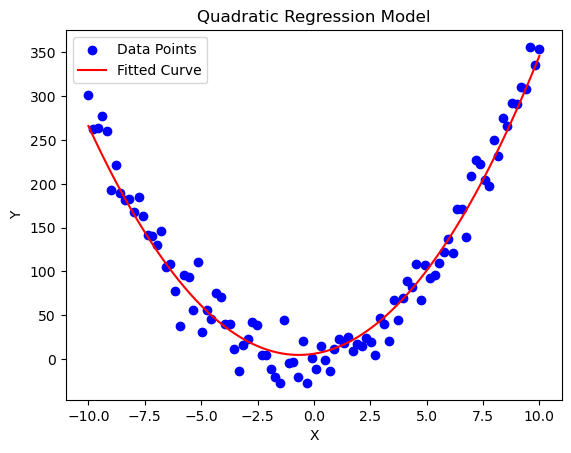

In [15]:
# 设置随机种子以确保结果可复现
np.random.seed(0)
torch.manual_seed(0)

# 构造一元二次曲线数据
x = np.linspace(-10, 10, 100)
y = 3 * x**2 + 4 * x + 6 + np.random.normal(0, 20, 100)  # 添加噪声

# 转换为PyTorch张量
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# 定义二次回归模型
class QuadraticRegressionModel(nn.Module):
    def __init__(self):
        super(QuadraticRegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 2)  # 输入层到隐藏层，输出两个值，分别对应二次项和一次项系数
        self.fc2 = nn.Linear(2, 1)  # 隐藏层到输出层，输出预测的y值

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# 实例化模型
model = QuadraticRegressionModel()

# 定义损失函数（均方误差）
criterion = nn.MSELoss()

# 选择优化器（梯度下降）
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 测试模型
with torch.no_grad():
    predicted = model(x_tensor).numpy()

# 生成更密集的x值用于绘制平滑曲线
x_fine = np.linspace(-10, 10, 400)
x_fine_tensor = torch.tensor(x_fine, dtype=torch.float32).view(-1, 1)

with torch.no_grad():
    predicted_fine = model(x_fine_tensor).numpy()

# 绘制原始数据点和拟合曲线
plt.scatter(x, y, color='blue', label='Data Points')  # 绘制原始数据点

y_true = 3 * x_fine**2 + 4 * x_fine + 6
plt.plot(x_fine, y_true, color='r',  label='Fitted Curve') # 绘制拟合曲线

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Regression Model')
plt.legend()
plt.show()